# <center> 📺Netflix EDA and Movie Recommendation System🍿

![](https://www.extremetech.com/wp-content/uploads/2016/03/Netflix-Feature.jpg)

Netflix is the world's leading streaming entertainment service with 208 million paid memberships in over 190 countries enjoying TV series, documentaries and feature films across a wide variety of genres and languages. Members can watch as much as they want, anytime, anywhere, on any internet-connected screen. Members can play, pause and resume watching, all without commercials or commitments.

### Here I have done a detailed analysis of netflix content data with awesome visualizations and built a Recommendation System.

## 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


### Reading Data

In [2]:
df=pd.read_csv("/Users/Michela/Documents/IDS/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,budget,revenue,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,30000000,373554033.0,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,65000000,262797249.0,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,0,0.0,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,16000000,81452156.0,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,0,76578911.0,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape 

(8808, 14)

In [4]:
df[['title','listed_in']]

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries"
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act..."
3,Jailbirds New Orleans,"Docuseries, Reality TV"
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8803,Zombie Dumb,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Zombieland,"Comedies, Horror Movies"
8805,Zoom,"Children & Family Movies, Comedies"
8806,Zubaan,"Dramas, International Movies, Music & Musicals"


In [5]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

## 2. Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      6173 non-null   object 
 4   cast          7982 non-null   object 
 5   country       7976 non-null   object 
 6   date_added    8797 non-null   object 
 7   release_year  8807 non-null   float64
 8   rating        8803 non-null   object 
 9   budget        8808 non-null   int64  
 10  revenue       8807 non-null   float64
 11  duration      8804 non-null   object 
 12  listed_in     8807 non-null   object 
 13  description   8807 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 963.5+ KB


### --> Checking for missing values

In [7]:
df.isnull().sum()

show_id            1
type               1
title              1
director        2635
cast             826
country          832
date_added        11
release_year       1
rating             5
budget             0
revenue            1
duration           4
listed_in          1
description        1
dtype: int64

### --> Handling missing values

In [8]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['country'].mode()[0])
df.isnull().sum()

show_id            1
type               1
title              1
director        2635
cast             826
country            0
date_added         0
release_year       1
rating             0
budget             0
revenue            1
duration           4
listed_in          1
description        1
dtype: int64

In [9]:
df = df.dropna( how='any',subset=['cast', 'director','duration'])
    
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
budget          0
revenue         0
duration        0
listed_in       0
description     0
dtype: int64

- All the missing values in the dataset have either been removed or filled. There are no missing values left.

In [10]:
df.duplicated().sum()

0

- dataset has 0 duplicated values.

### --> Cleaning the data

Adding some new columns:
- listed_in - Genre
* Year Added - year_add
* Month Added - month_add
* Princial Country - country_main 

In [11]:
#Rename the 'listed_in' column as 'Genre' for easy understanding
df = df.rename(columns={"listed_in":"Genre"})
df['Genre'] = df['Genre'].apply(lambda x: x.split(",")[0])
df['Genre'].head()

2              Crime TV Shows
5                   TV Dramas
6    Children & Family Movies
7                      Dramas
8            British TV Shows
Name: Genre, dtype: object

In [12]:
df['year_add'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_add'].head()

2    2021
5    2021
6    2021
7    2021
8    2021
Name: year_add, dtype: object

In [13]:
df['month_add'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_add'].head()

2    September
5    September
6    September
7    September
8    September
Name: month_add, dtype: object

In [14]:
df['country_main'] = df['country'].apply(lambda x: x.split(",")[0])
df['country_main'].head()

2     United States
5     United States
6     United States
7     United States
8    United Kingdom
Name: country_main, dtype: object

In [15]:
df['type'].value_counts()

Movie      5519
TV Show     178
Name: type, dtype: int64

In [16]:
df['rating'].value_counts()

TV-MA            1939
TV-14            1329
R                 789
PG-13             477
TV-PG             456
PG                279
TV-Y7             123
TV-Y              102
TV-G               96
NR                 58
G                  40
TV-Y7-FV            3
UR                  3
NC-17               2
United States       1
Name: rating, dtype: int64

-- Making two new dataframes, one with movies collection and other with TV shows collection:
* movie_df
* tv_df

In [17]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [18]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,budget,revenue,duration,Genre,description,year_add,month_add,country_main
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021.0,PG,58000000,0.0,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993.0,TV-MA,0,0.0,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September,United States
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021.0,PG-13,58000000,352194034.0,104 min,Comedies,A woman adjusting to life after a loss contend...,2021,September,United States
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021.0,TV-MA,0,11348324.0,127 min,Dramas,After most of her family is murdered in a terr...,2021,September,Germany
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,"September 22, 2021",2021.0,TV-PG,44000000,13681765.0,91 min,Children & Family Movies,When the clever but socially-awkward Tetê join...,2021,September,United States


### Handling Outliers

<AxesSubplot:xlabel='revenue'>

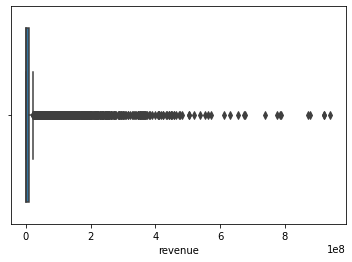

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='revenue', data=df)

<AxesSubplot:xlabel='budget'>

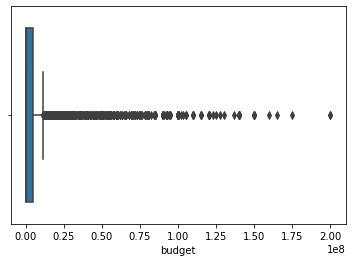

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='budget', data=df)

## 3. Exploratory Data Analysis

### --> Number of Movies vs TV Shows

<AxesSubplot:xlabel='type', ylabel='count'>

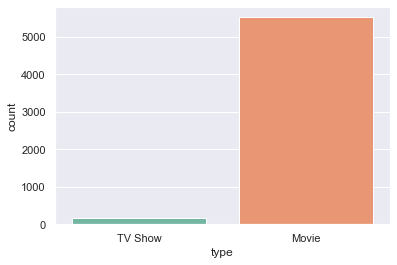

In [21]:
sns.set(style="darkgrid")
sns.countplot(x="type", data= df, palette="Set2")

- Movies/TV shows were mostly released after 2010

### --> Ratings analysis

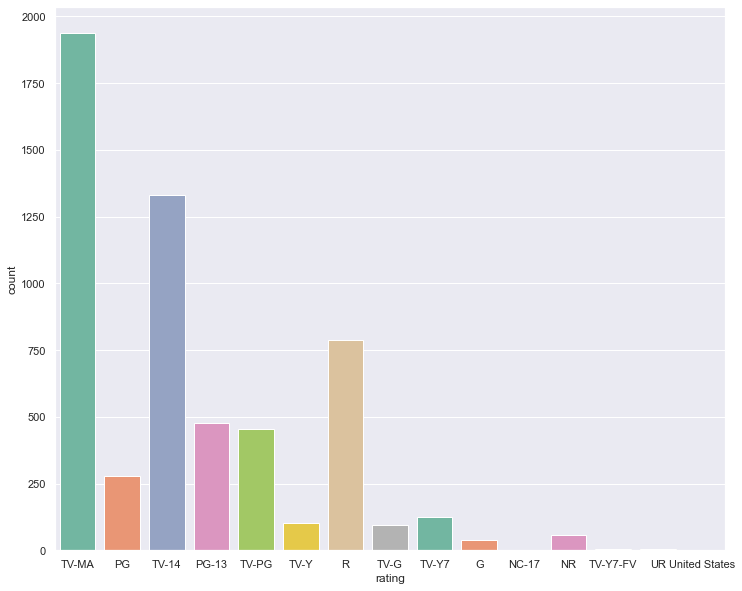

In [22]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="Set2")

- Movies/TV shows are mostly TV-MA rated

### --> Movies Ratings analysis

<AxesSubplot:xlabel='rating', ylabel='count'>

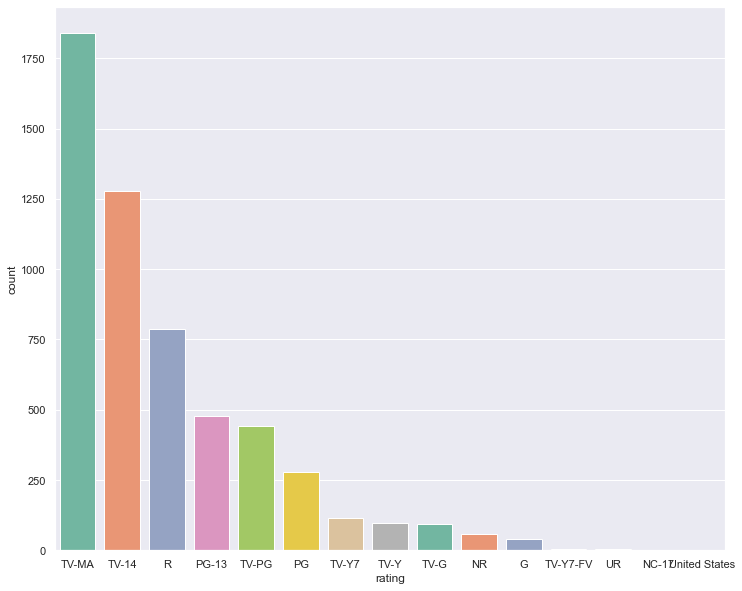

In [23]:
#MOVIES RATINGS
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x="rating", data= movie_df, palette="Set2", order=movie_df['rating'].value_counts().index[0:15])

- The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only. 
- Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.
- Third largest is the  very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17.

### -->  TV Shows Ratings analysis

<AxesSubplot:xlabel='rating', ylabel='count'>

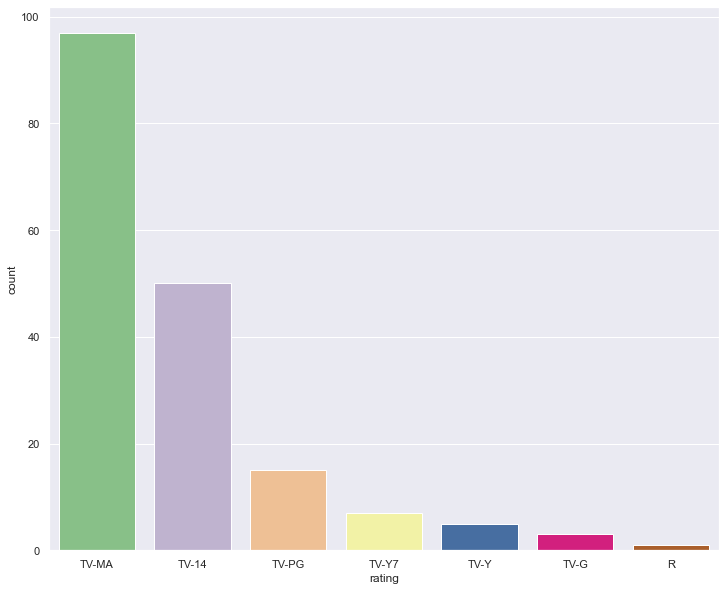

In [24]:
# TV SHOWS RATINGS
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x="rating", data=tv_df, palette="Accent", order=tv_df['rating'].value_counts().index[0:15])

- Most of the TV Shows has 'TV-14' ratings which stands for the content can be inappropriate for children under 14 years of age.
- Second highest count of ratings in TV Shows is 'TV-MA', for which the content is for matured audience only.
- TV Shows has least amount of counts with 'R' ratings.

### -> Period of years movies/tv shows were released in

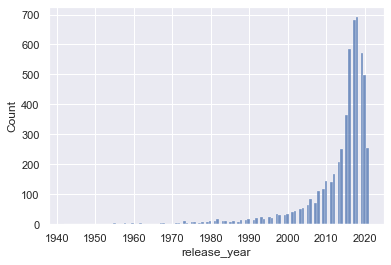

In [25]:
import seaborn as sns
sns.histplot(x='release_year', data=df, )
sns.set(rc={'figure.figsize':(20,27)})
plt.show()

- There are more Movies on Netflix than TV shows.

### --> Yearly Analysis of content

<AxesSubplot:xlabel='count', ylabel='release_year'>

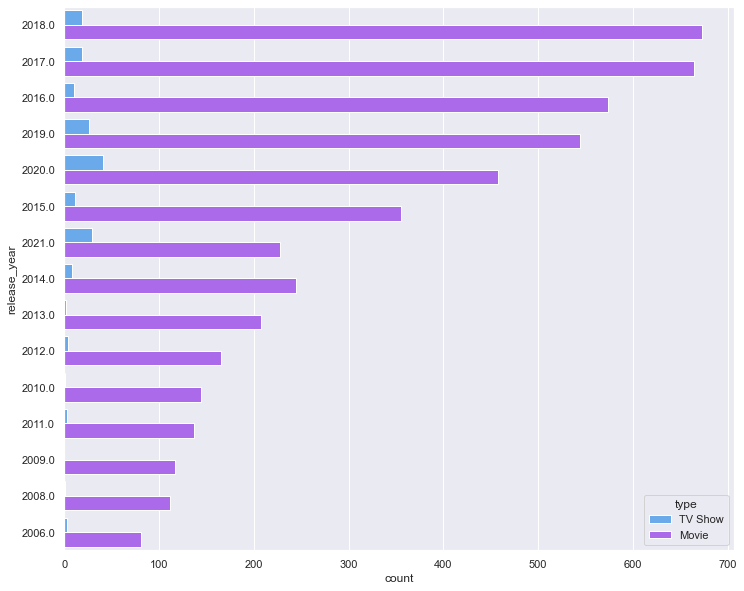

In [26]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(y="release_year", data= df, palette="cool", order= df['release_year'].value_counts().index[0:15],hue=df['type'])

- We can see that Netflix released most number of content in year 2017.
- Noticeable growth in releasing content can be seen from the year 2015.

### --> Best Month for directors to release content

#### We can analyse the months in which least amount of contents are added, that months can be best for directors to release their content for better audience attention.

In [45]:
df_copy = df.copy()
net_date = df_copy[['date_added']]
net_date['year'] = net_date['date_added'].apply(lambda x : x.split(', ')[-1])
net_date['month'] = net_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_copy = net_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T


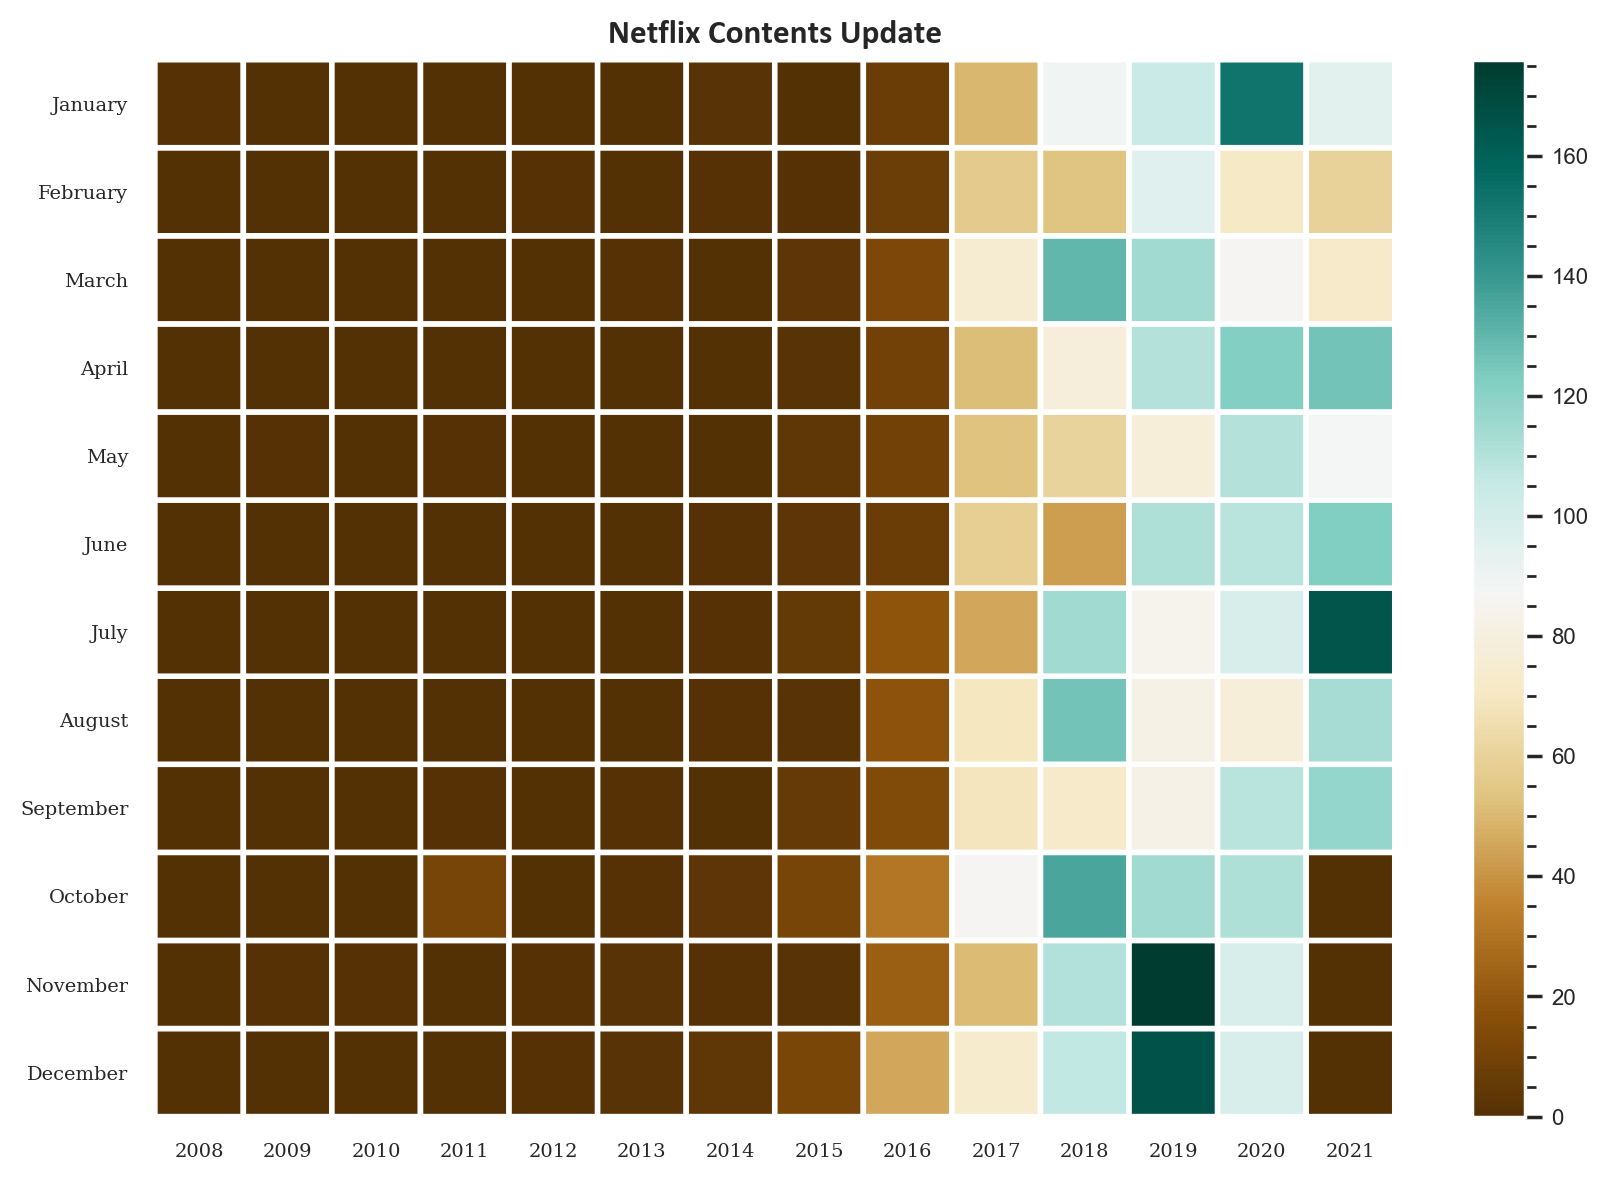

In [46]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df_copy, cmap='BrBG', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df_copy.columns), 1), df_copy.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df_copy.index), 1), df_copy.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

### -->Understanding what content is available in different countries

In [34]:
# Different Genres from Countries
columns=['Genre','country_main']
gen_country = df [columns]

In [35]:
gen_country.head()

,Genre,country_main
2,Crime TV Shows,United States
5,TV Dramas,United States
6,Children & Family Movies,United States
7,Dramas,United States
8,British TV Shows,United Kingdom


In [36]:
gen_country['Genre'].value_counts()

Dramas                          1586
Comedies                        1184
Action & Adventure               848
Children & Family Movies         548
Documentaries                    397
Stand-Up Comedy                  309
Horror Movies                    274
International Movies             122
Classic Movies                    73
Thrillers                         65
International TV Shows            59
Crime TV Shows                    37
Movies                            27
British TV Shows                  21
Independent Movies                20
Anime Features                    19
Music & Musicals                  18
Sci-Fi & Fantasy                  13
Cult Movies                       12
Kids' TV                          11
Anime Series                      11
Docuseries                        10
TV Shows                           9
Stand-Up Comedy & Talk Shows       8
Romantic Movies                    3
TV Comedies                        3
TV Action & Adventure              2
T

In [37]:
size = gen_country['Genre'].value_counts().tolist()
size

[1586,
 1184,
 848,
 548,
 397,
 309,
 274,
 122,
 73,
 65,
 59,
 37,
 27,
 21,
 20,
 19,
 18,
 13,
 12,
 11,
 11,
 10,
 9,
 8,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1]

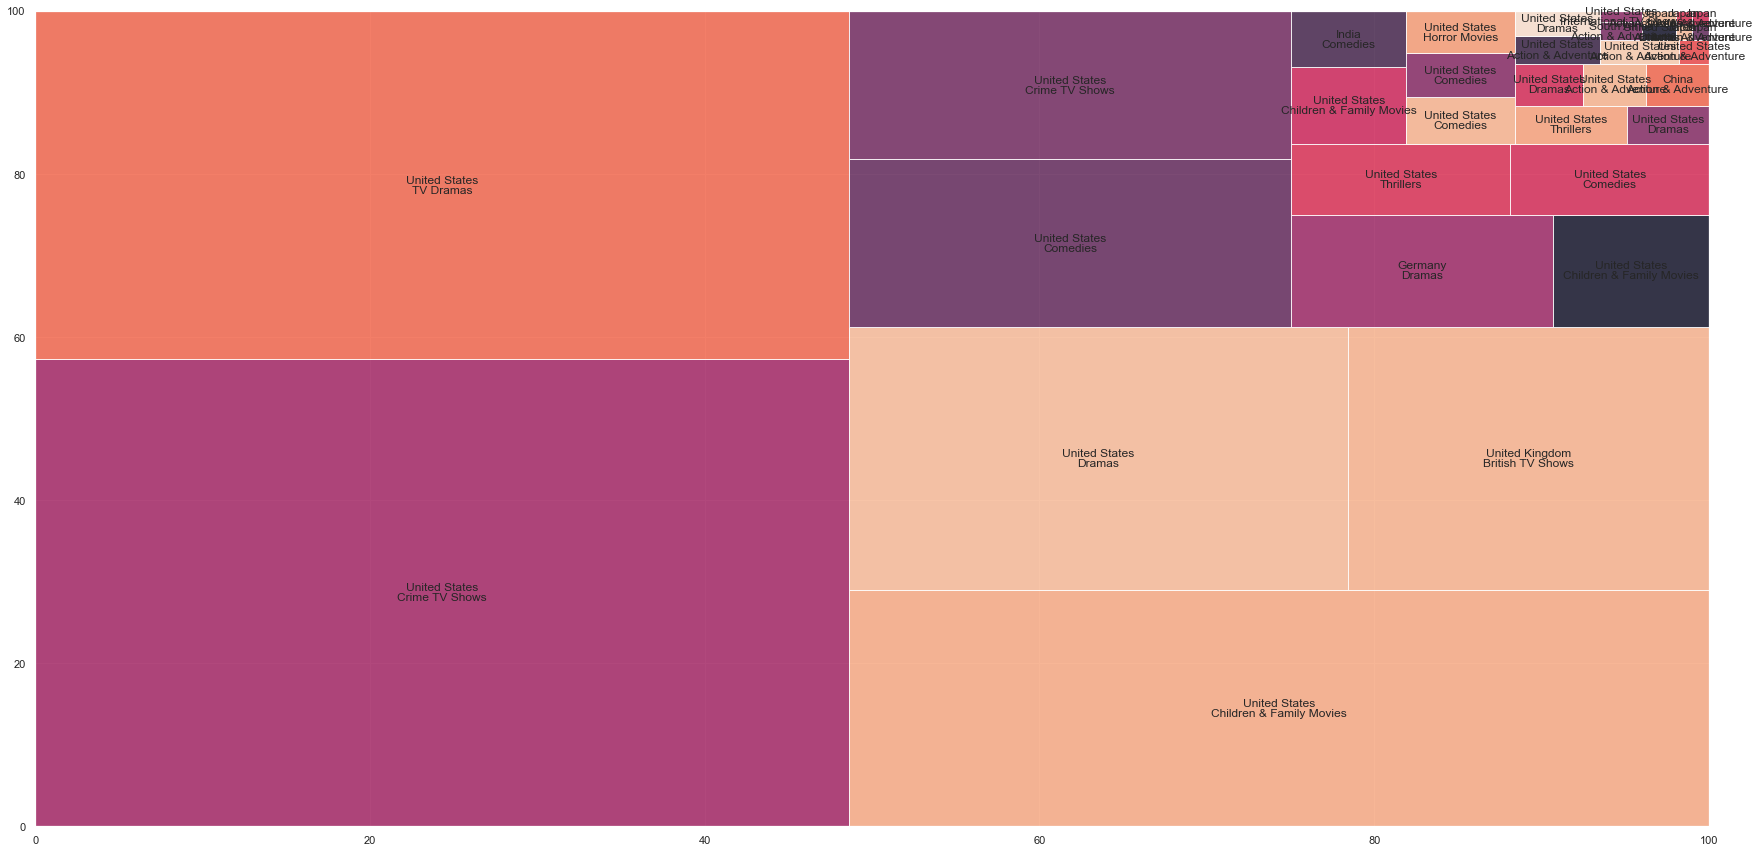

In [38]:
# GENRES BY COUNTRIES
import squarify
plt.figure(figsize=(30,15))
squarify.plot(value= gen_country['Genre'], label= gen_country['country_main'], sizes= size, alpha=0.8)
plt.rc('font', size=14)
plt.show()

- United states produces most amount of content in 'Comedies' and 'Childern & Family movies' Genres.

### --> Analysis between budget and revenue

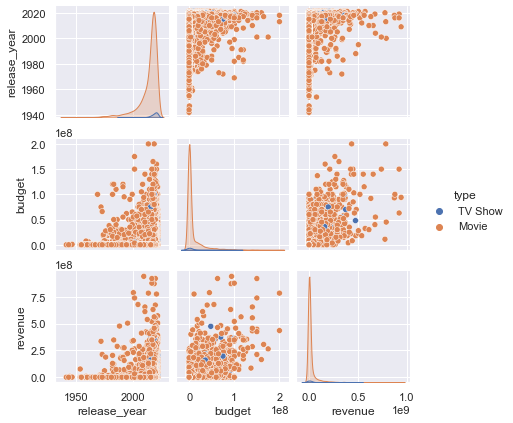

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='type', height=2)

### --> Analysis of TV Shows with most number of seasons

- In the years of **1960 to 1965**, Movies durations were over **200 minutes, after 1965 the durations became comparitively shorter.**
- From the year **1980**, we can see consistent trend of movie durations, of which duration time is around in **between 100-150 minutes.**

In [27]:
tv_df['duration']=tv_df['duration'].str.replace(' Season','')
tv_df['duration']=tv_df['duration'].str.replace('s','')
tv_df['duration']=tv_df['duration'].astype(str).astype(int)
tv_df['duration']

2       1
5       1
8       9
11      1
47      1
       ..
8172    1
8214    1
8293    1
8302    1
8599    3
Name: duration, Length: 178, dtype: int32

--> Extract TV Shows titles and its number of seasons:

In [28]:
#Extract the columns from tv_df
columns=['title','duration']
tv_shows = tv_df[columns]

In [29]:
#sort the dataframe by number of seasons
tv_shows = tv_shows.sort_values(by='duration',ascending=False)
tv_shows
top20 = tv_shows[0:20]
top20

,title,duration
2423,Supernatural,15
3541,Naruto,9
8,The Great British Baking Show,9
1998,Call the Midwife,9
2947,Arrow,8
7896,Royal Pains,8
380,The Flash,7
3653,Comedians in Cars Getting Coffee,6
1173,Men on a Mission,6
6742,Father Brown,6


<AxesSubplot:xlabel='title'>

<Figure size 1440x432 with 0 Axes>

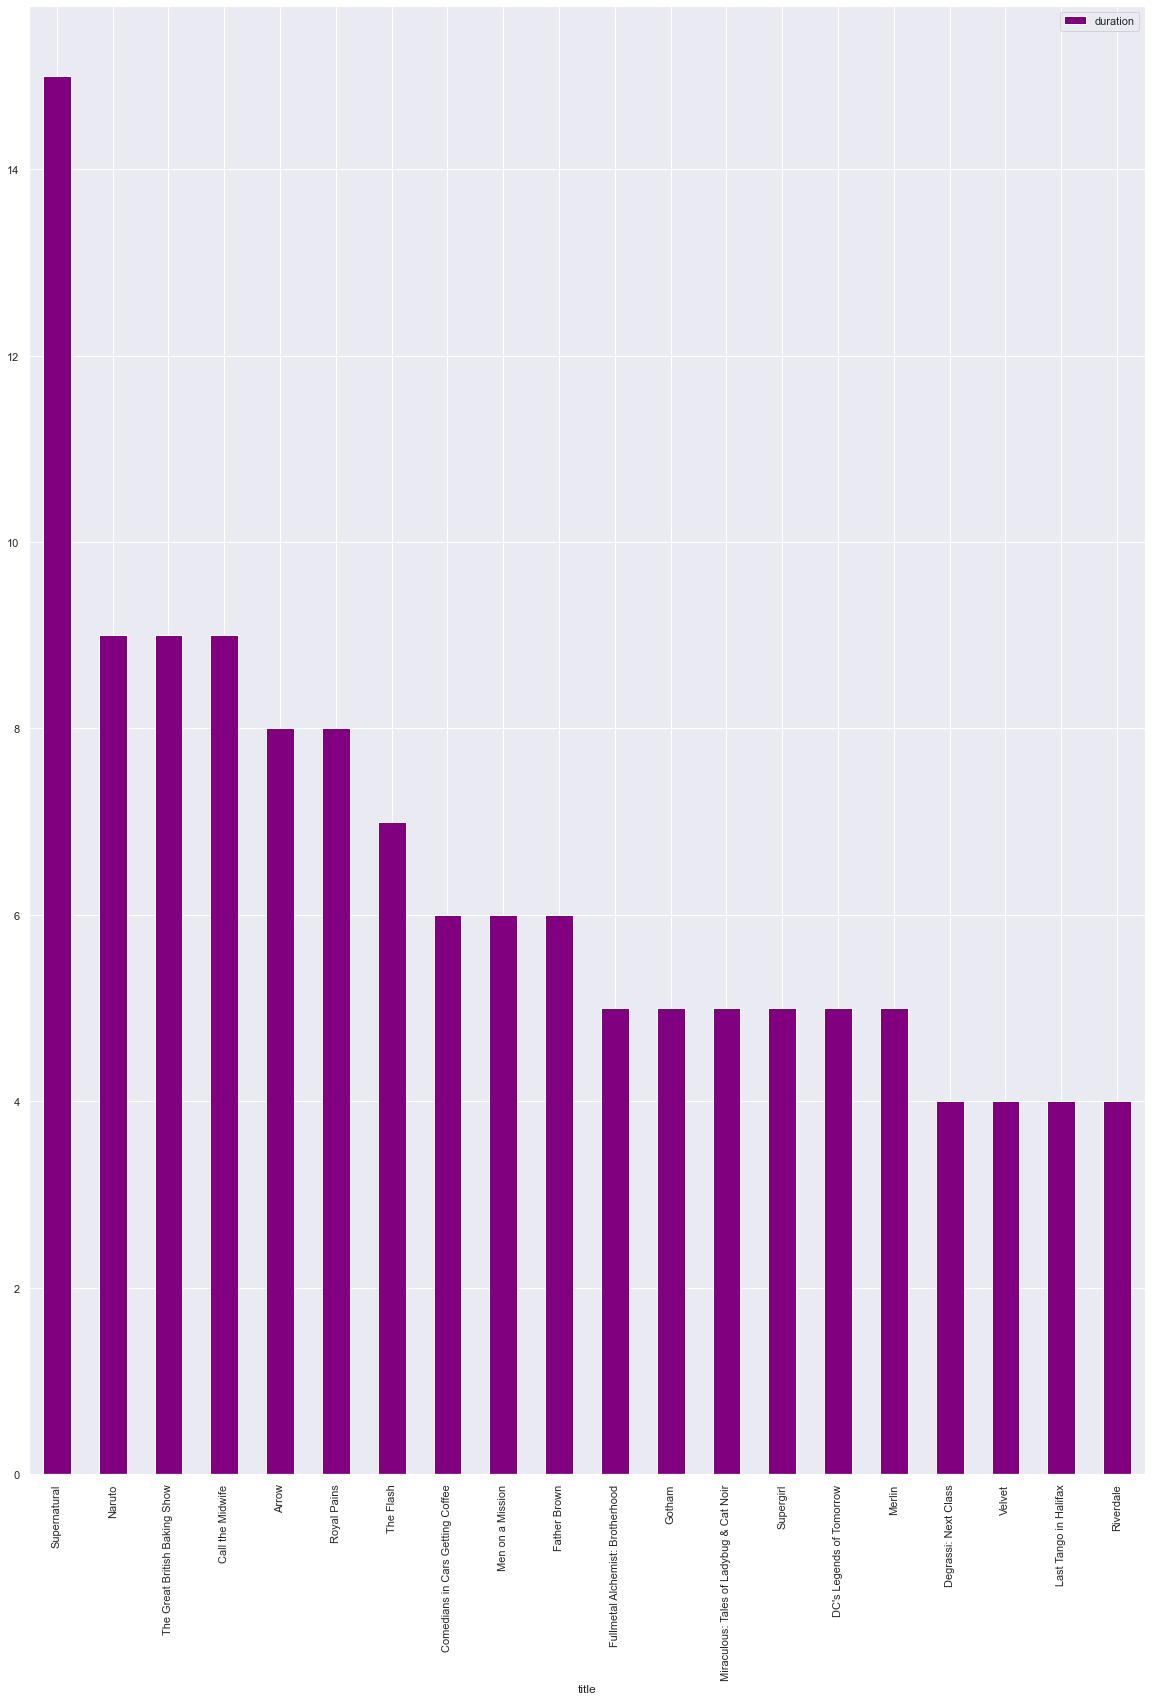

In [30]:
plt.figure(figsize=(20,6))
top20.plot(kind='bar',x='title',y='duration', color='purple')

- **Supernatural , Naruto** has the highest numbers of seasons

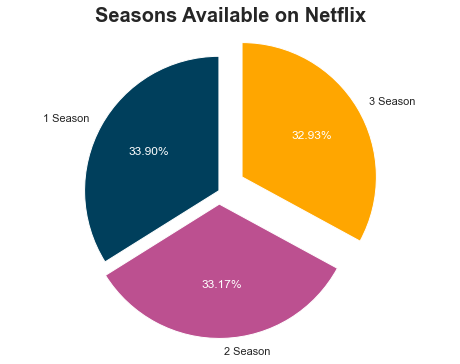

In [31]:
# TV SHOWS AND THEIR SEASONS
plt.figure(figsize=(8, 6))
labels=['1 Season', '2 Season', '3 Season']
_, _, texts = plt.pie(df.duration.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1, 0.2), colors=['#003f5c', '#bc5090', '#ffa600'])
plt.axis('equal')
plt.title('Seasons Available on Netflix', fontsize=20, fontweight='bold');
for text in texts:
    text.set_color('white')

- From the chart we can analyze, **35.04% TV Shows has only 1 Season,32.48% TV Shows has 2 seasons and 32.48% Tv Shows has 3 seasons** available

### --> Countries on top for movies content creation

<AxesSubplot:xlabel='country_main', ylabel='count'>

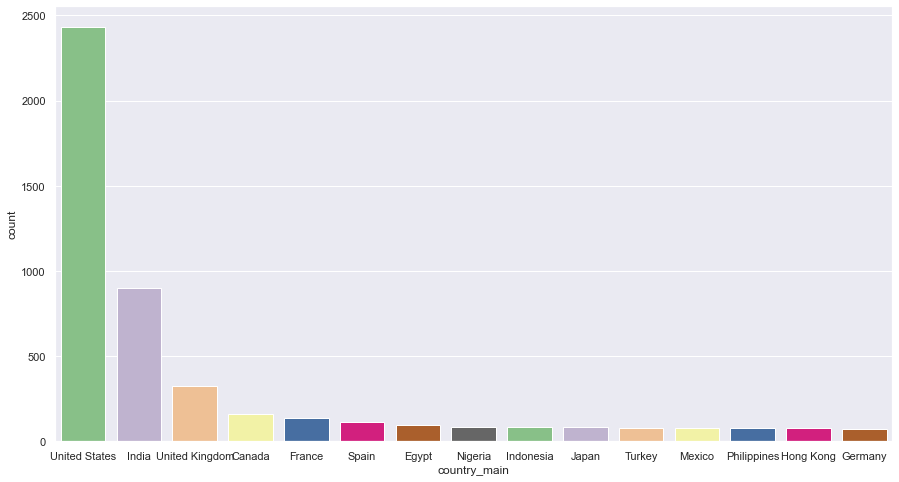

In [32]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.countplot(x="country_main", data=movie_df, palette="Accent", order=movie_df['country_main'].value_counts().index[0:15])

- **United States** creates highest amount of movies followed by ***India and UK.***


### --> Countries on top for TV Show content creation

<AxesSubplot:xlabel='country_main', ylabel='count'>

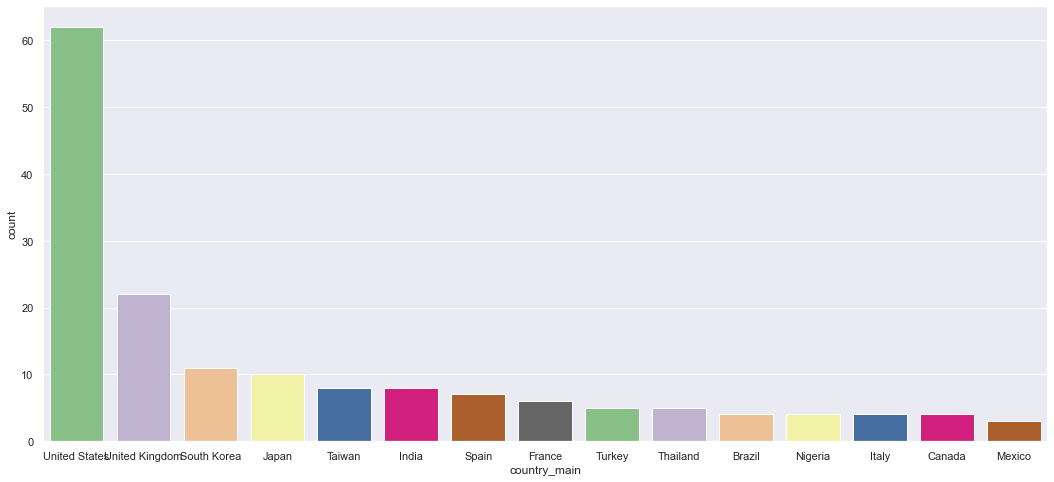

In [33]:
plt.figure(figsize=(18,8))
sns.set(style="darkgrid")
sns.countplot(x="country_main", data=tv_df, palette="Accent", order=tv_df['country_main'].value_counts().index[0:15])

- **United States,United Kingdom,South Korea,Japan** creates most of the amount of TV Shows on netflix.

### --> Directors with most number of Movies produced

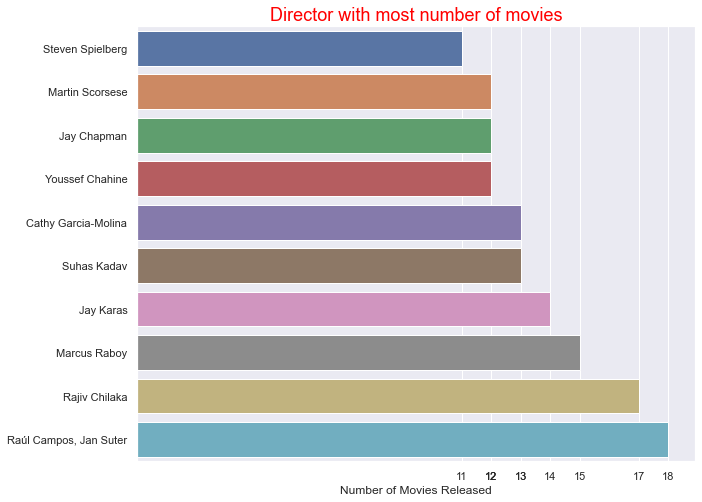

In [41]:
plt.figure(figsize=(10,8))
sns.barplot(y= movie_df.director.value_counts()[:10].sort_values().index, x=movie_df.director.value_counts()[:10].sort_values().values);
plt.title('Director with most number of movies', color='red', fontsize=18)
plt.xticks(movie_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Movies Released');


- Director **Raul Campos,Jan Suter** Produced **highest number of movies: 18** on Netflix till now.

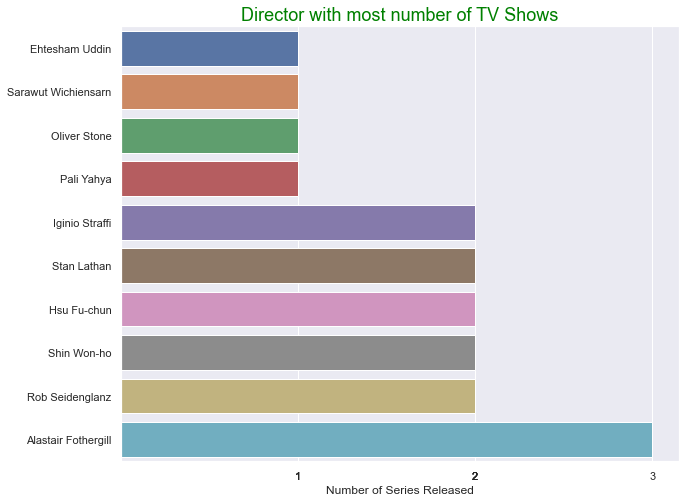

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(y= tv_df.director.value_counts()[:10].sort_values().index, x=tv_df.director.value_counts()[:10].sort_values().values);
plt.title('Director with most number of TV Shows', color='green', fontsize=18)
plt.xticks(tv_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Series Released');

- Director **Alastair Fothergill** released **highest number of TV shows:3** on Netflix.

### --> Most Popular Genre on Netflix

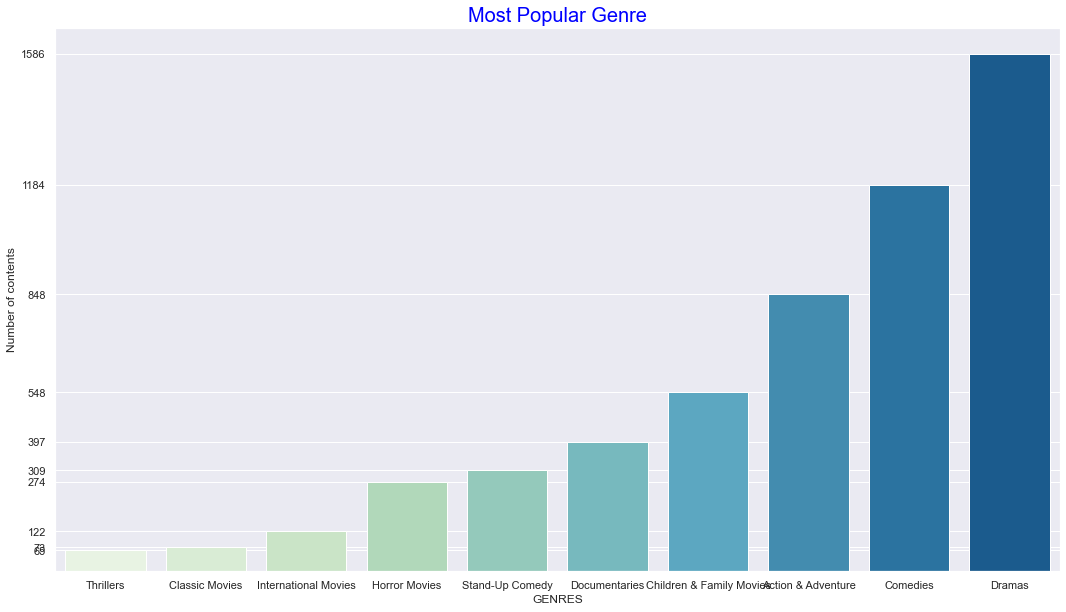

In [43]:
plt.figure(figsize=(18,10))
sns.barplot(x= df.Genre.value_counts()[:10].sort_values().index, y=df.Genre.value_counts()[:10].sort_values().values,palette='GnBu');
plt.title('Most Popular Genre', color='Blue', fontsize=20)
plt.yticks(df.Genre.value_counts()[:10].sort_values().values);
plt.xlabel('GENRES');
plt.ylabel('Number of contents');

- **Netflix knows how much we all love drama..!! :p**

### --> Top Actor/Actresses on Netflix

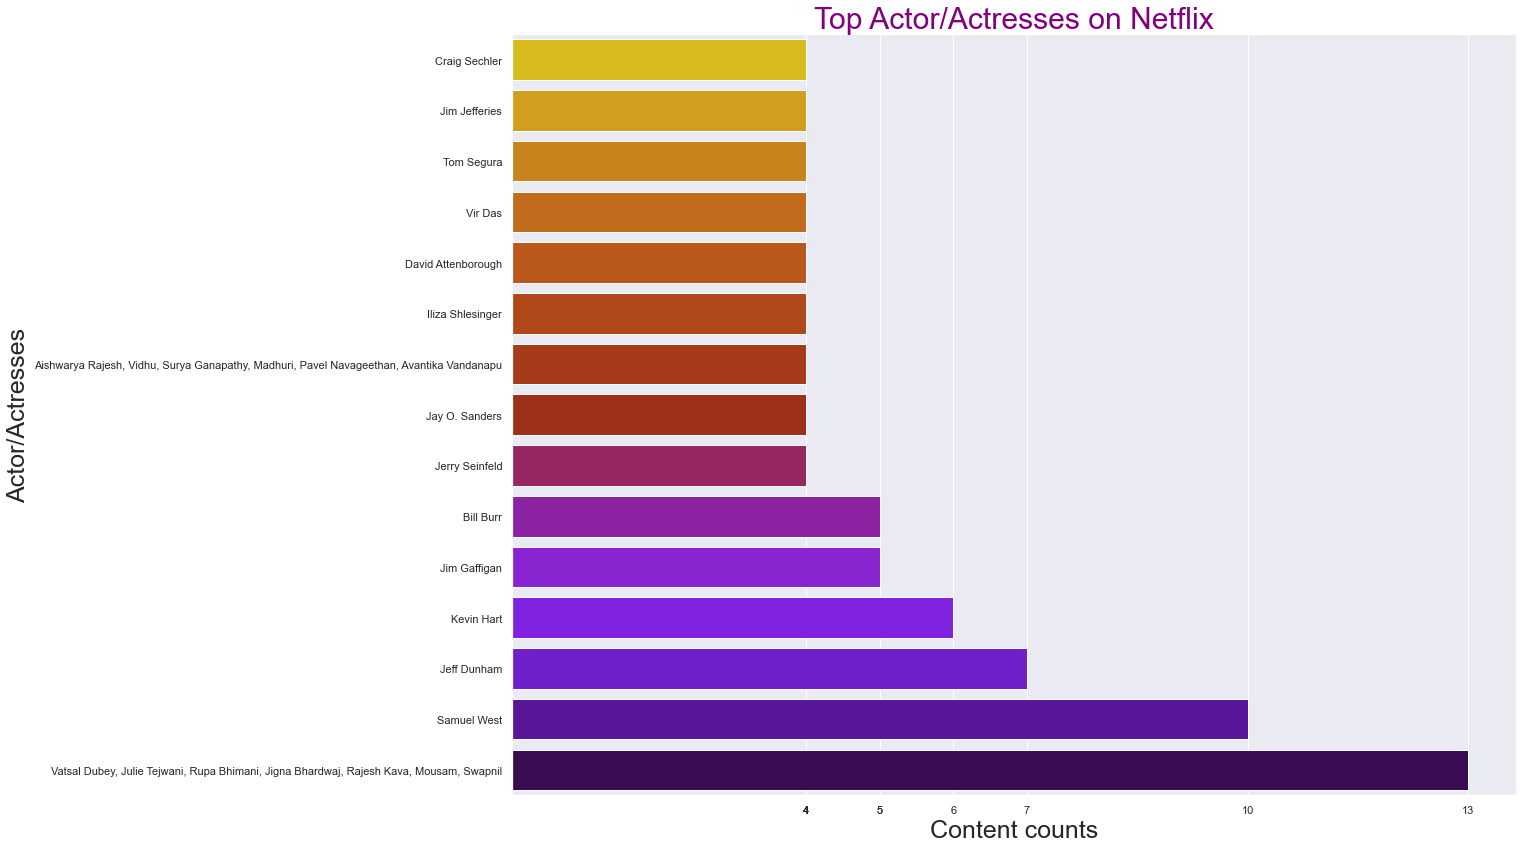

In [44]:
plt.figure(figsize=(18,14))
sns.barplot(y= df.cast.value_counts()[:15].sort_values().index, x=df.cast.value_counts()[:15].sort_values().values,palette='gnuplot_r');
plt.title('Top Actor/Actresses on Netflix', color='purple', fontsize=30)
plt.xticks(df.cast.value_counts()[:10].sort_values().values);
plt.ylabel('Actor/Actresses', fontsize=25);
plt.xlabel('Content counts', fontsize=25);

- Actor **'Samuel West'** has highest number of movies/Tv shows on Netflix.

## 4. Netflix Recommendation System

## Content Based Filtering

- For this recommender system the content of the movie (cast, description, director,genre etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

![](https://miro.medium.com/max/998/1*O_GU8xLVlFx8WweIzKNCNw.png)

## Plot description based Recommender

- We will calculate similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **description** feature of our dataset.

In [47]:
df['description'].head()

2    To protect his family from a powerful drug lor...
5    The arrival of a charismatic young priest brin...
6    Equestria's divided. But a bright-eyed hero be...
7    On a photo shoot in Ghana, an American model s...
8    A talented batch of amateur bakers face off in...
Name: description, dtype: object

We need to convert the word vector of each overview.We'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each description.The overall importance of each word to the documents in which they appear is equal to TF * IDF.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [49]:
#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(5697, 14765)

In [50]:
tfidf_matrix

<5697x14765 sparse matrix of type '<class 'numpy.float64'>'
	with 78429 stored elements in Compressed Sparse Row format>

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

In [51]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

-- we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [52]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

-- Let's define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies.

In [72]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [94]:
get_recommendations('jaws')

42                                      Jaws 2
44                           Jaws: The Revenge
43                                      Jaws 3
5455                              Maya Memsaab
7061                               In The Deep
8115                        Suicide (Hitabdut)
5784         Iliza Shlesinger: Confirmed Kills
3511                                Avengement
7491    Monster High: Escape from Skull Shores
8652                                      Ugly
Name: title, dtype: object

In [92]:
get_recommendations('pk')

4221                           Merku Thodarchi Malai
906     Have You Ever Seen Fireflies? - Theatre Play
6031                              A Clockwork Orange
4306                                            ROMA
4569                        Harishchandrachi Factory
4700                         Bhavesh Joshi Superhero
4565                              Ek Main Aur Ekk Tu
8314                               The Frozen Ground
2952                   Tom Papa: You're Doing Great!
4457                                      Satyagraha
Name: title, dtype: object

In [91]:
get_recommendations('kung fu panda')

7347                                    Love on Delivery
8303                                     The Five Venoms
5864    Crouching Tiger, Hidden Dragon: Sword of Destiny
6464                         Chhota Bheem Kungfu Dhamaka
5857                Kung Fu Panda: Secrets of the Scroll
574                                      Kung Fu Panda 2
7390                                      Man of Tai Chi
295                                     The Paper Tigers
423                      Chhota Bheem: Master of Shaolin
38                                   Birth of the Dragon
Name: title, dtype: object

In [90]:
get_recommendations('you')

1970        The Blue Elephant 2
6392                    Burning
4688            The After Party
1945    Manorama Six Feet Under
4697                 The Motive
1209               Just In Time
5846                The Do-Over
1938               Ankhon Dekhi
2757      Pretty Little Stalker
4094                     Genius
Name: title, dtype: object

- This is completely plot based recommendations. we can see these are not so accurate, so we can try to add more metrics to improve model performance.

## Multiple metrics(Genre,cast,director)  based Recommender System

From the Genre,cast and director features, we need to extract the three most important actors, the director and genres associated with that movie.

In [76]:
features=['Genre','director','cast','description','title']
filters = df[features]

In [77]:
#Cleaning the data by making all the words in lower case.
def clean_data(x):
        return str.lower(x.replace(":", ""))

In [78]:
for feature in features:
    filters[feature] = filters[feature].apply(clean_data)
    
filters.head()

,Genre,director,cast,description,title
2,crime tv shows,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",to protect his family from a powerful drug lor...,ganglands
5,tv dramas,mike flanagan,"kate siegel, zach gilford, hamish linklater, h...",the arrival of a charismatic young priest brin...,midnight mass
6,children & family movies,"robert cullen, josé luis ucha","vanessa hudgens, kimiko glenn, james marsden, ...",equestria's divided. but a bright-eyed hero be...,my little pony a new generation
7,dramas,haile gerima,"kofi ghanaba, oyafunmike ogunlano, alexandra d...","on a photo shoot in ghana, an american model s...",sankofa
8,british tv shows,andy devonshire,"mel giedroyc, sue perkins, mary berry, paul ho...",a talented batch of amateur bakers face off in...,the great british baking show


- We can now create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer.

In [79]:
def create_soup(x):
    return x['director'] + ' ' + x['cast'] + ' ' +x['Genre']+' '+ x['description']

In [80]:
filters['soup'] = filters.apply(create_soup, axis=1)

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the **CountVectorizer()** instead of TF-IDF.

In [81]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filters['soup'])

In [82]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [83]:
filters

,Genre,director,cast,description,title,soup
2,crime tv shows,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",to protect his family from a powerful drug lor...,ganglands,"julien leclercq sami bouajila, tracy gotoas, s..."
5,tv dramas,mike flanagan,"kate siegel, zach gilford, hamish linklater, h...",the arrival of a charismatic young priest brin...,midnight mass,"mike flanagan kate siegel, zach gilford, hamis..."
6,children & family movies,"robert cullen, josé luis ucha","vanessa hudgens, kimiko glenn, james marsden, ...",equestria's divided. but a bright-eyed hero be...,my little pony a new generation,"robert cullen, josé luis ucha vanessa hudgens,..."
7,dramas,haile gerima,"kofi ghanaba, oyafunmike ogunlano, alexandra d...","on a photo shoot in ghana, an american model s...",sankofa,"haile gerima kofi ghanaba, oyafunmike ogunlano..."
8,british tv shows,andy devonshire,"mel giedroyc, sue perkins, mary berry, paul ho...",a talented batch of amateur bakers face off in...,the great british baking show,"andy devonshire mel giedroyc, sue perkins, mar..."
...,...,...,...,...,...,...
8801,dramas,majid al ansari,"ali suliman, saleh bakri, yasa, ali al-jabri, ...",recovering alcoholic talal wakes up inside a s...,zinzana,"majid al ansari ali suliman, saleh bakri, yasa..."
8802,cult movies,david fincher,"mark ruffalo, jake gyllenhaal, robert downey j...","a political cartoonist, a crime reporter and a...",zodiac,"david fincher mark ruffalo, jake gyllenhaal, r..."
8804,comedies,ruben fleischer,"jesse eisenberg, woody harrelson, emma stone, ...",looking to survive in a world taken over by zo...,zombieland,"ruben fleischer jesse eisenberg, woody harrels..."
8805,children & family movies,peter hewitt,"tim allen, courteney cox, chevy chase, kate ma...","dragged from civilian life, a former superhero...",zoom,"peter hewitt tim allen, courteney cox, chevy c..."


In [84]:
# Reset index of our main DataFrame and construct reverse mapping as before
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [85]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
#     title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [95]:
get_recommendations_new('a cinderella story', cosine_sim2)

6041                                 A Holiday Engagement
1151                         Octonauts & the Ring of Fire
1024                               Arlo the Alligator Boy
7594                   Norm of the North: Family Vacation
1859                   Octonauts & the Great Barrier Reef
6798                                           Free Willy
8159    Teenage Mutant Ninja Turtles II: The Secret of...
7008                Hotel Transylvania 3: Summer Vacation
6243                              Barbie: Video Game Hero
2858    Calico Critters: Everyone's Big Dream Flying i...
Name: title, dtype: object

In [87]:
get_recommendations_new('you', cosine_sim2)

7112                     Jack Taylor
2939                      Horse Girl
7670              Operation Chromite
5852                            Hush
3928                         Persona
6392                         Burning
3461              Cheese in the Trap
2602    The Forest of Love: Deep Cut
5555                 Hoff the Record
739                      Wish Dragon
Name: title, dtype: object

In [88]:
get_recommendations_new('naruto', cosine_sim2)

56               Naruto Shippuden the Movie: Blood Prison
7559                      Naruto Shippuden : Blood Prison
57                      Naruto Shippûden the Movie: Bonds
63      Naruto the Movie: Ninja Clash in the Land of Snow
59                            Naruto Shippuden: The Movie
58           Naruto Shippûden the Movie: The Will of Fire
62      Naruto the Movie 3: Guardians of the Crescent ...
5096                     Fullmetal Alchemist: Brotherhood
61       Naruto the Movie 2: Legend of the Stone of Gelel
1432                                 The Idhun Chronicles
Name: title, dtype: object

In [96]:
get_recommendations_new('chennai express', cosine_sim2)

5616                                              Dilwale
5617                                       Happy New Year
3134                                                Don 2
4952                                         Main Hoon Na
5482                                 Kabhi Haan Kabhi Naa
3376    My Next Guest with David Letterman and Shah Ru...
5460                             Oh Darling Yeh Hai India
207             Mission Istaanbul: Darr Ke Aagey Jeet Hai
4954                                         Om Shanti Om
5472                                                Raees
Name: title, dtype: object